<a href="https://colab.research.google.com/github/AshimaSharma25/Class-Exer/blob/main/Assignment2_AshimaSharma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from requests import get
from bs4 import BeautifulSoup
import numpy as np , pandas as pd
from random import randint
from time import sleep
from warnings import warn
import seaborn as sns
import matplotlib. pyplot as plt
from sys import set_coroutine_origin_tracking_depth
from urllib. parse import urlparse, parse_qs, urlunparse, urlencode
import datetime
import random

# Define your base_url and HEADERS here
HEADERS = {'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebkit/605.1.15 (KHTML, like Gecko) Mobile/15E148'}
base_url= 'https://www.imdb.com/search/title/?year='

movie_array=[]
# Define a list of years to loop through
years = range (2010, 2021)
count=1
max_requests = 70
request_count = 0
pages = np. arange (1, 250, 50)
for year in years:
# Create a dictionary with the year
  count=1
  for page in pages:

    #sleep (randint (8,15))
    url_with_year = base_url + str(year)+'&start='+str(page)
    #print (url_with_year)
    try:
                response = requests.get(url_with_year, headers=HEADERS)

                #throw warning for status codes that are not 200
                if response.status_code != 200:
                  warn('Request: {}; Status code: {}'.format(requests, response.status_code))
                soup = BeautifulSoup(response.text,'lxml')
                request_count=request_count+1
                # print(soup)
                #check for max request
                if(request_count>max_requests):
                  break
                #print(request_count)
                #sleep(randint(8,15))
                # container=soup.findAll('div',class_='lister-item mode-advanced')
                container=soup.findAll('li',class_="ipc-metadata-list-summary-item")
                # print(container)
                for moviecontainer in container:
                  score= moviecontainer.find('span',class_="metacritic-score-box")
                  ##check with someone
                  if score is not None:
                    ##print(metascore.text.strip())
                    title= moviecontainer.h3.text.strip('-,() ')[3:]
                    # print(title)
                    metascore=score.text.strip()
                    #metascore=1
                    # print(metascore)
                    #year_o= moviecontainer.find(class_='lister-item-year').text.strip('-,() ')[-4:]
                    year_o= moviecontainer.find('span',class_="dli-title-metadata-item").text
                    # print(year_o)
                    rating= moviecontainer.find('span',class_="ipc-rating-star--imdb").text.strip('-,() ')[0:4]
                    # print(rating)
                    # votes = moviecontainer.find('span', {'name': 'nv'}).text.strip()
                    votes = moviecontainer.find('div', class_="sc-21df249b-0 jmcDPS").text.strip('-,() ')[-6:]
                    # print(votes)
                    movie_array.append([title,year,metascore,rating,votes])

    except requests.exceptions.RequestException as e:
            print(f"An error occurred: {e}")

df = pd.DataFrame(movie_array, columns=['Title','Year','Metascore','IMDB Rating','Votes'])
df

,Title,Year,Metascore,IMDB Rating,Votes
0,Scott Pilgrim vs. the World,2010,69,7.5,"53,486"
1,Inception,2010,74,8.8,"87,661"
2,Legion,2010,32,5.3,"10,105"
3,The Social Network,2010,95,7.8,"41,788"
4,Shutter Island,2010,63,8.2,"10,214"
...,...,...,...,...,...
1355,A Nice Girl Like You,2020,41,5.1,"s6,752"
1356,The Invisible Man,2020,72,7.1,"47,293"
1357,Holidate,2020,44,6.1,"74,763"
1358,Greyhound,2020,64,7.0,"08,707"


In [ ]:
# Write the DataFrame to a CSV file
df.to_csv('movie_data.csv', index=False)

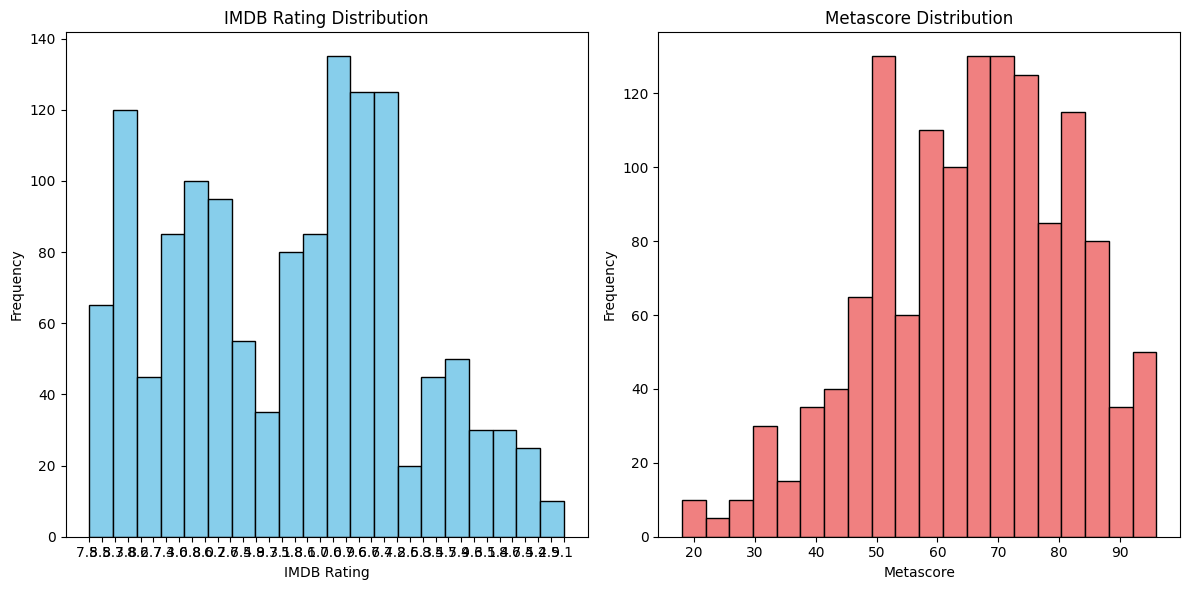

In [ ]:
#converting metascore to integer
df['Metascore'] = df['Metascore'].astype(int)  # Convert the Metascores to integers

# Create two histograms for visual comparison
plt.figure(figsize=(12, 6))
# Histogram for IMDb ratings
plt.subplot(1, 2, 1)
plt.hist(df['IMDB Rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('IMDB Rating Distribution')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')

# Histogram for Metascore
plt.subplot(1, 2, 2)
plt.hist(df['Metascore'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Metascore Distribution')
plt.xlabel('Metascore')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()